# Automatic Differentiation with torch.autograd

In [3]:
import torch

### Step 1. Data

In [4]:
# 1. Given input and target : x, y
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # target

### Step 2. Model

In [5]:
# parameters w, b
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

#2. Forward propagation to ouput z
z = torch.matmul(x, w)+b

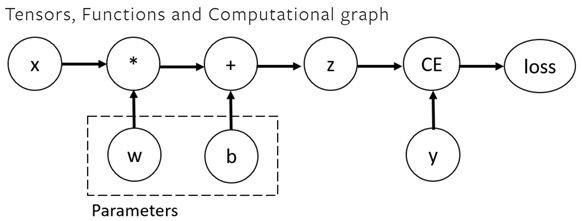

### Step 3. Loss

In [6]:
# 3. Loss Calculation
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [7]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f901b2b49d0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward object at 0x7f901b2b4a10>


### Step 4. Optimization : Computing Gradients

In [8]:
# 4. Backward propagation to compute gradients
loss.backward()

print(w.grad)
print(b.grad)

tensor([[0.0056, 0.1884, 0.1839],
        [0.0056, 0.1884, 0.1839],
        [0.0056, 0.1884, 0.1839],
        [0.0056, 0.1884, 0.1839],
        [0.0056, 0.1884, 0.1839]])
tensor([0.0056, 0.1884, 0.1839])


Disabling Gradient Tracking

In [9]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Another way to achieve the same result is to use the detach() method on the tensor:

In [10]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False
